# Praktická statistika - HW02

načtení knihoven:

In [2]:
.libPaths("../libs")
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




načtení dat datasetu case1202:<br>
(v linuxu mi nešla nainstalovat knihovna sleuth2, takže jsem si data ve windows exportoval do csv)

In [3]:
df <- read.csv("./my_data.csv", sep=";", dec=",")
attach(df)

In [4]:
head(df)

,Bsal,Sal77,Sex,Senior,Age,Educ,Exper
,<int>,<dbl>,<chr>,<int>,<int>,<int>,<dbl>
1,5040,12420,Male,96,329,15,14.0
2,6300,12060,Male,82,357,15,72.0
3,6000,15120,Male,67,315,15,35.5
4,6000,16320,Male,97,354,12,24.0
5,6000,12300,Male,66,351,12,56.0
6,6840,10380,Male,92,374,15,41.5


# Průzkum dat

Data obsahují údaje o zaměstnancích z jedné pracovní kategorie (kvalifikovaní, základní úředníci) banky, která byla žalována za diskriminaci na základě pohlaví. Údaje jsou o 32 mužích a 61 ženách zaměstnaných v letech 1965 až 1975.

Popis sloupců:

Bsal: nástupní roční plat<br>

Sal77: roční plat k březnu 1975<br>

Sex: pohlaví<br>

Senior: počet měsíců od prvního zaměstnání<br>

Age: věk zaměstnance v měsících!<br>

Educ: vzdělání (počet let)<br>

Exper: pracovní zkušenosti před nástupem (v měsících)<br>

In [5]:
summary(df)

      Bsal          Sal77           Sex                Senior     
 Min.   :3900   Min.   : 7860   Length:93          Min.   :65.00  
 1st Qu.:4980   1st Qu.: 9000   Class :character   1st Qu.:74.00  
 Median :5400   Median :10020   Mode  :character   Median :84.00  
 Mean   :5420   Mean   :10393                      Mean   :82.28  
 3rd Qu.:6000   3rd Qu.:11220                      3rd Qu.:90.00  
 Max.   :8100   Max.   :16320                      Max.   :98.00  
      Age             Educ           Exper      
 Min.   :280.0   Min.   : 8.00   Min.   :  0.0  
 1st Qu.:349.0   1st Qu.:12.00   1st Qu.: 35.5  
 Median :468.0   Median :12.00   Median : 70.0  
 Mean   :474.4   Mean   :12.51   Mean   :100.9  
 3rd Qu.:590.0   3rd Qu.:15.00   3rd Qu.:144.0  
 Max.   :774.0   Max.   :16.00   Max.   :381.0  

Z výstupu výše je vidět, že průměrný plat k březnu 1975 zamestnanců v bance byl 10393 dolarů za rok<br>
nejmenší plat byl 7860 a největší 16320

Zároveň je vidět, že průměrný věk zaměstnance byl 474 měsíců - 39.5 let

Je zajímavé, že průměrná doba vzdělání byla 12.5 let

Také je zajímavé, že průměrný nástupní plat je skoro poloviční oproti platu k březnu 1975

[1] "Pruměrný plat:"


[1] 10392.9

[1] "Median:"


[1] 10020

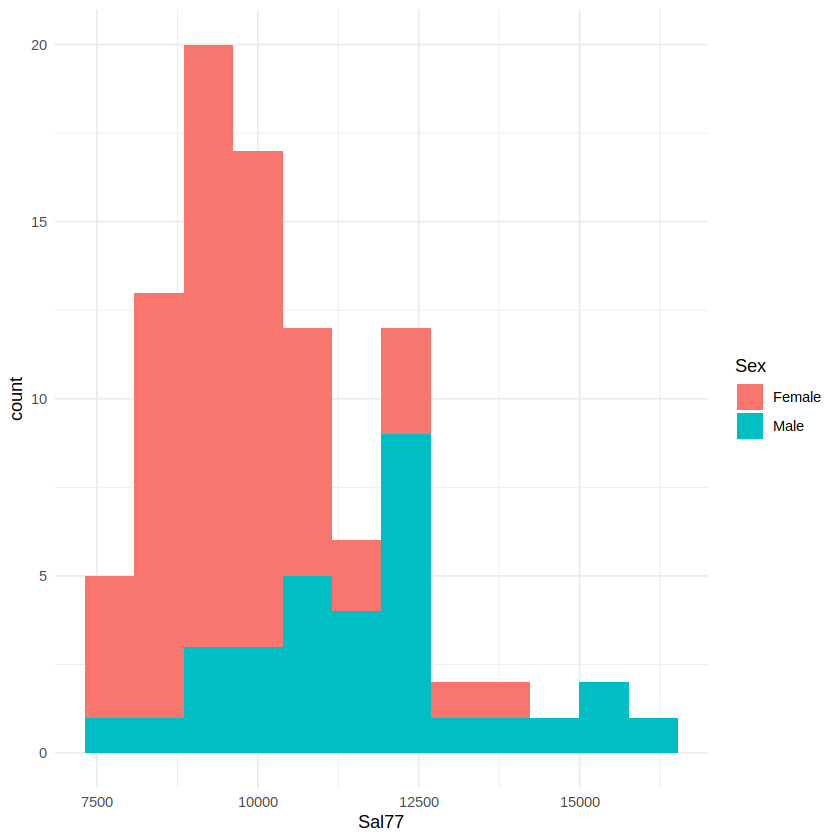

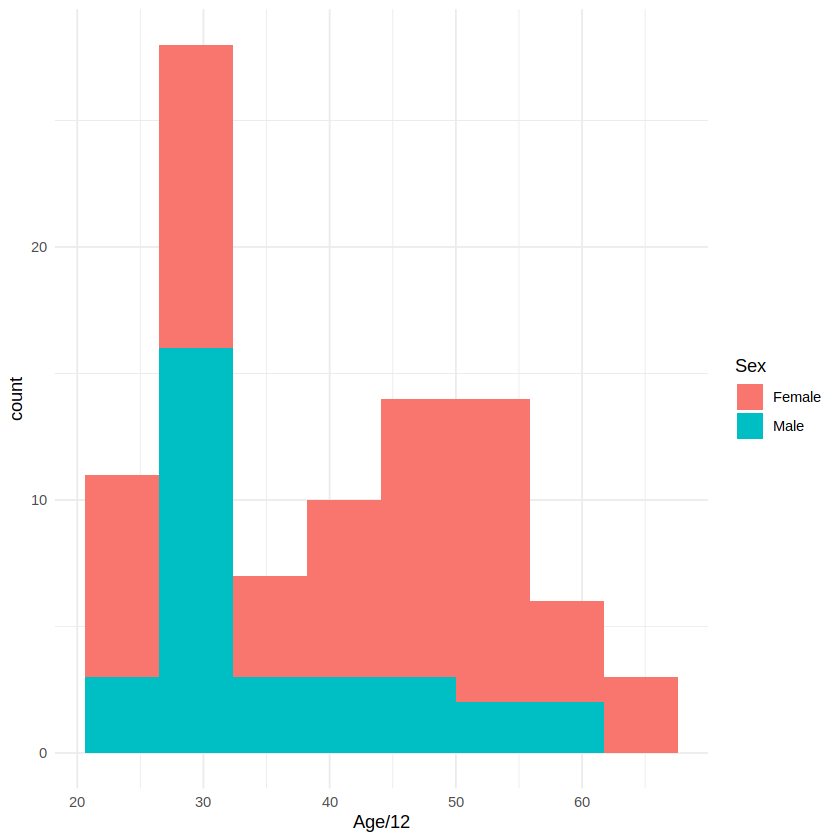

In [56]:
print("Pruměrný plat:")
mean(Sal77)
print("Median:")
median(Sal77)


ggplot(df, aes(x=Sal77, fill=Sex)) +
    geom_histogram(bins=12) +
    theme_minimal()

ggplot(df, aes(x=Age/12, fill=Sex)) +
    geom_histogram(bins=8) +
    theme_minimal()

Histogram platu je zajímavý. Je vidět, že muži mají vyšší platy než ženy.

Z histogramu rozložení platu je vidět také to, že je více zaměstnanců, kteří pobírají podprůměrný plat, než zaměstnanců, kteří pobírají nadprůměrný plat. Mohlo by to být kvůli tomu, že v bance pracuje více žen (a ty mají mají nižší platy než muži).

Z histogramu věku je vidět, že v bance pracuje hodně žen. Mužům, kteří pracují v bance, je kolem 30 let. Je zajímavé, že ženy pracující v bance jsou výrazně starší než muži.

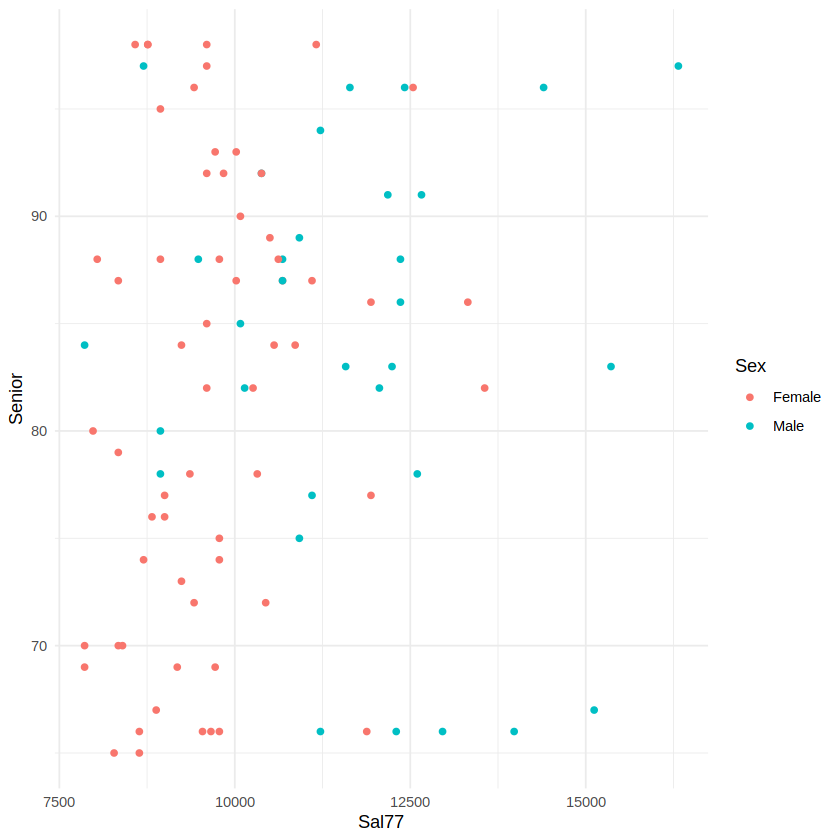

In [40]:
ggplot(df, aes(x=Sal77, y=Senior, color=Sex)) +
    geom_point() +
    theme_minimal()

Z tohoto grafu je vidět, že plat překvapivě moc nezáleží na zkušenosti zaměstnance (počtu mesíců od jeho prvního zaměsnání).

Stejně tak není znatelný rozdíl specifikujeme-li dataset čistě na muže nebo ženy.

<br>
Pro lepší představu korelace jednotlivých veličin si vykreslíme graf s korelacemi mezi všemi dvojcemi příznaků:

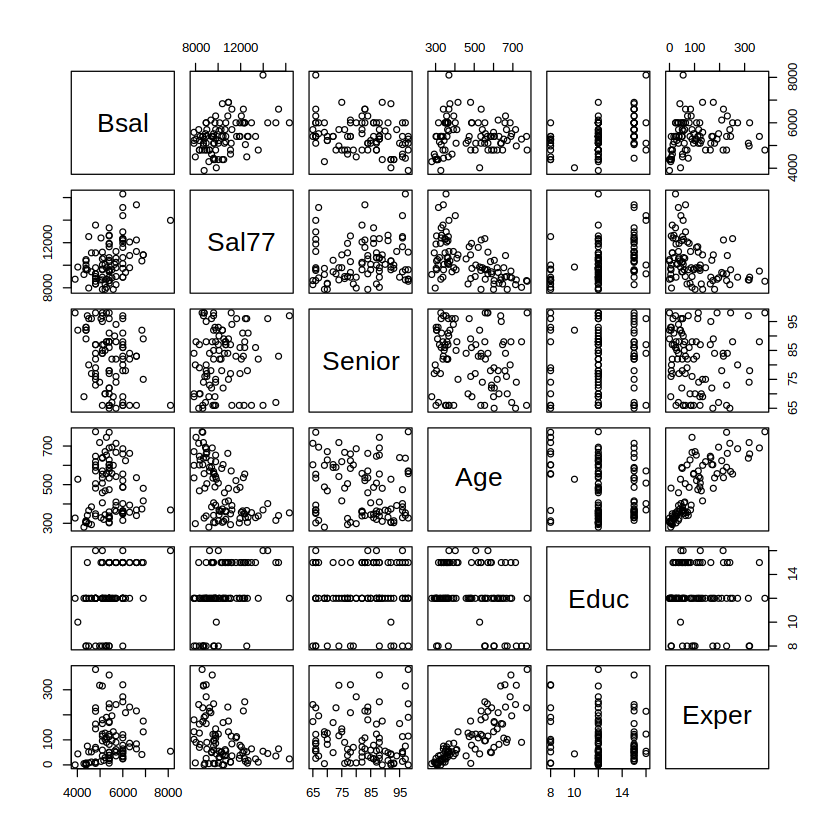

In [8]:
pairs(select_if(df, is.numeric))

pro ještě lepší představu korelační matici:

,Bsal,Sal77,Senior,Age,Educ,Exper
Bsal,1.00000000,0.4223695,-0.28584352,0.03389932,0.41198516,0.16674049
Sal77,0.42236948,1.0000000,0.12595515,-0.54674689,0.42102125,-0.37198640
Senior,-0.28584352,0.1259551,1.00000000,-0.18448263,0.05984385,-0.07466085
Age,0.03389932,-0.5467469,-0.18448263,1.00000000,-0.22525298,0.79787476
Educ,0.41198516,0.4210213,0.05984385,-0.22525298,1.00000000,-0.10117309
Exper,0.16674049,-0.3719864,-0.07466085,0.79787476,-0.10117309,1.00000000


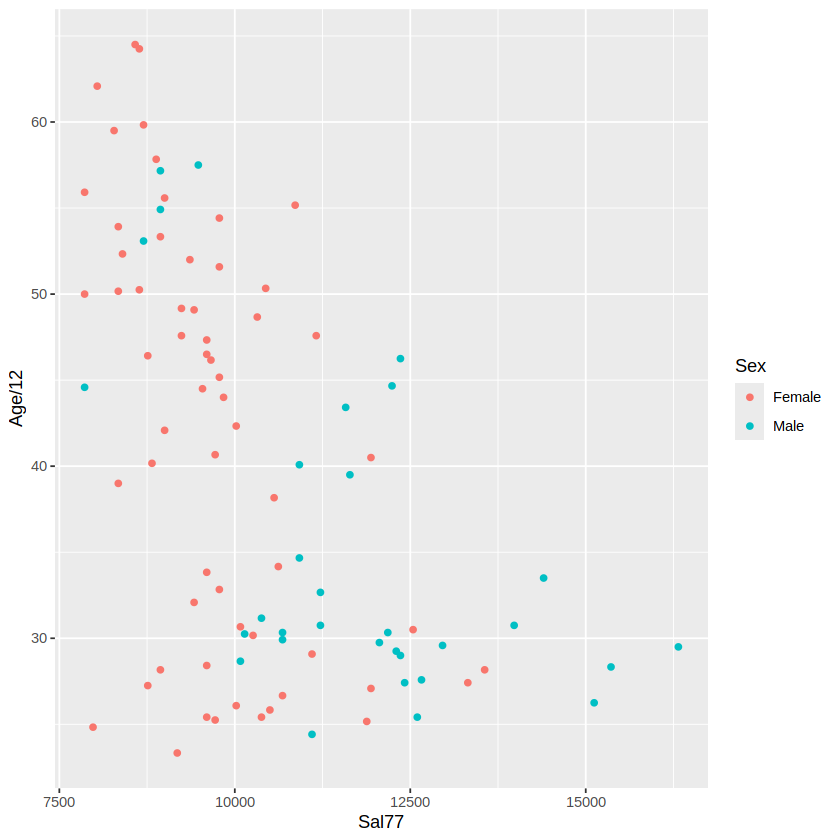

In [37]:
cor(select_if(df, is.numeric))

ggplot(df, aes(x=Sal77, y=Age/12, color=Sex)) +
    geom_point()

Z předchozího výstupu je vidět, že plat má v absolutní hodnotě největší korelační koeficient s věkem.<br>
Korelační keoficient je záporný - to znamená, že plat bude klesat s rostoucím věkem.

Je zajímavé, že velikost ročního platu je více korelovaný s věkem než například s nástupním platem.

Z grafu je vidět, že starší zaměstnanci jsou spíše ženy

Korelační koeficient věku a platu je záporný - plat klesá s rostoucím věkem. Dalo by se debatovat o tom, že ženy mají průměrně nižší platy kvůli tomu, že tam pracují spíše starší ženy (které mají nižší plat). Nemyslím si, že to je pravda a spíše to bude naopak -> korelační koeficient je záporný, protože v bance jsou starší pracovnící spíše ženy, které mají nižší plat a tím pádem je korelační koeficient záporný.

Abychom viděli rozdíl mezi hodnotami pro všechny sloupce specifikujeme-li pohlaví, uděláme totéž pro dataset s muži a dataset s ženami.

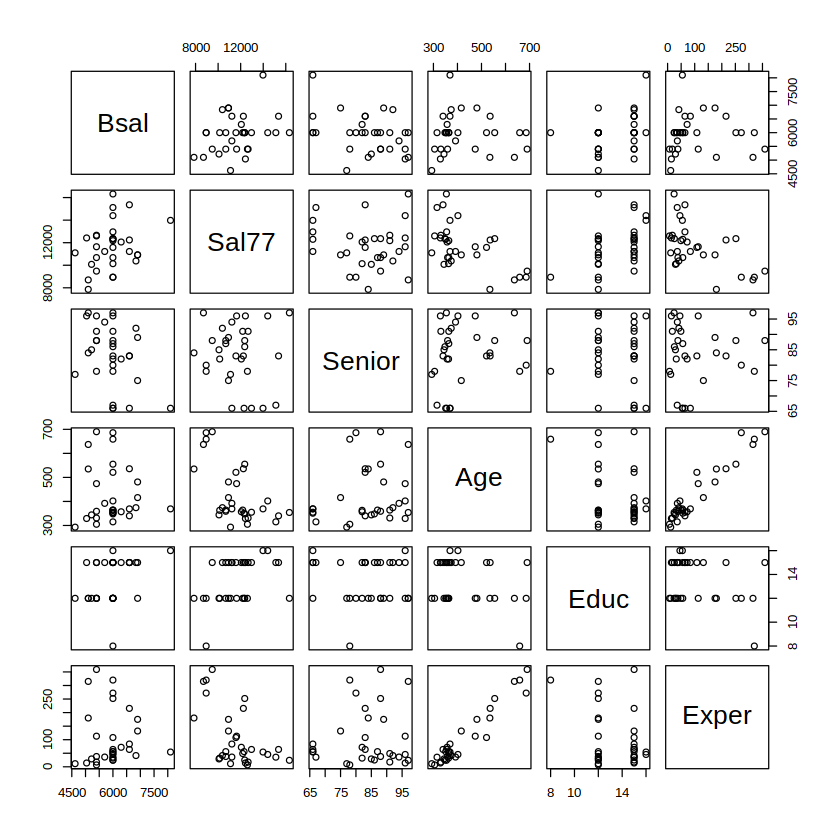

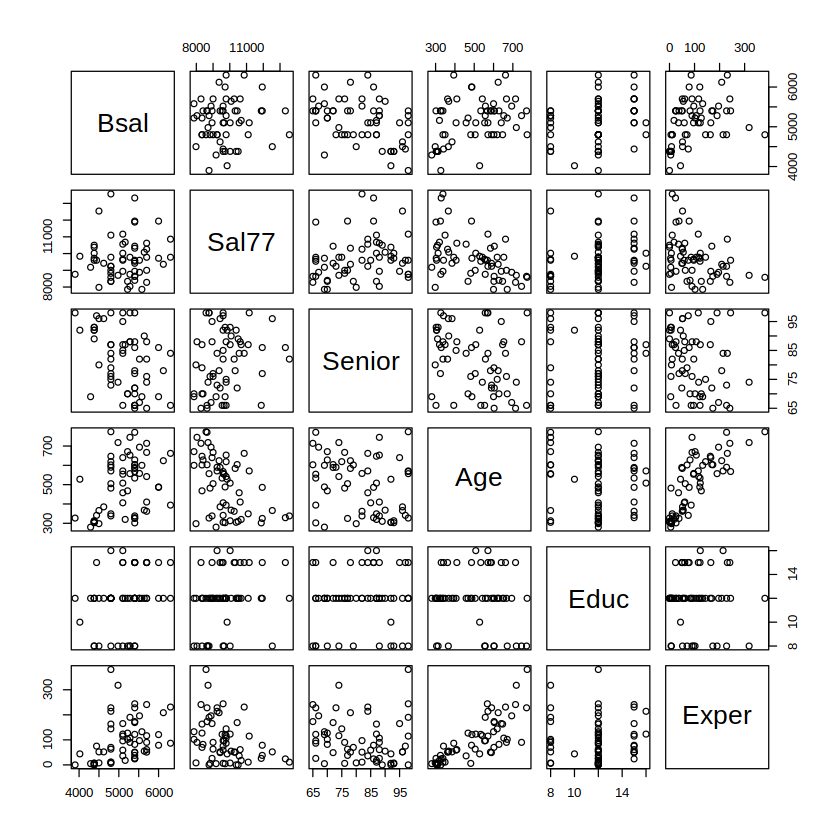

In [39]:
males_df <- subset(df, Sex == "Male")
females_df <- subset(df, Sex == "Female")

pairs(select_if(males_df, is.numeric))
pairs(select_if(females_df, is.numeric))

A korelační matice.

In [11]:
cor(select_if(males_df, is.numeric))
cor(select_if(females_df, is.numeric))

,Bsal,Sal77,Senior,Age,Educ,Exper
Bsal,1.000000000,0.31290314,-0.37326944,-0.04831859,0.3666823,-0.009795803
Sal77,0.312903137,1.00000000,-0.09122176,-0.57481817,0.4169689,-0.541853739
Senior,-0.373269436,-0.09122176,1.00000000,0.17718968,-0.0820740,0.075262508
Age,-0.048318591,-0.57481817,0.17718968,1.00000000,-0.3284301,0.961002385
Educ,0.366682322,0.41696890,-0.08207400,-0.32843009,1.0000000,-0.331371029
Exper,-0.009795803,-0.54185374,0.07526251,0.96100238,-0.3313710,1.000000000


,Bsal,Sal77,Senior,Age,Educ,Exper
Bsal,1.00000000,0.06079683,-0.43888318,0.3724696,0.265748243,0.345547170
Sal77,0.06079683,1.00000000,0.22749780,-0.4925873,0.267127110,-0.363919820
Senior,-0.43888318,0.22749780,1.00000000,-0.2972932,0.072733572,-0.164276478
Age,0.37246960,-0.49258728,-0.29729324,1.0000000,-0.094149902,0.788810789
Educ,0.26574824,0.26712711,0.07273357,-0.0941499,1.000000000,-0.006834517
Exper,0.34554717,-0.36391982,-0.16427648,0.7888108,-0.006834517,1.000000000


Zajímavý rozdíl je korelace nástpuního platu s přibývajícím věkem. U žen je tato korelace větší a kladná, zatímco u mužů nemá skoro vliv. Mohlo by to být tím, že ženy vyššího věku jsou již po mateřské a tedy neplánují v prvních pár letech přerušit zaměstnání kvůli těhotenství, což může negativně ovlivnit výši platu. Stejně tak je vidět, že s přibývajícím věkem je u můžů větší korelace s expertýzou(mohlo by být ze stejného důvodu).

# Zkoumání závislosti platu na numerickém regresoru
vysvětlovaná proměnná: Sal77

regresor: Age

In [12]:
model <- lm(Sal77 ~ Age, data=df)
summary(model)


Call:
lm(formula = Sal77 ~ Age, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3643.9 -1030.3  -168.0   847.8  5086.9 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13703.562    553.968  24.737  < 2e-16 ***
Age            -6.979      1.120  -6.229 1.43e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1507 on 91 degrees of freedom
Multiple R-squared:  0.2989,	Adjusted R-squared:  0.2912 
F-statistic:  38.8 on 1 and 91 DF,  p-value: 1.429e-08


Z výstuput výše je vidět, že nulovost interceptu i koeficientu u věku by se zamítla - mají velice nízkou p hodnotu

Je zajímavé, že s rostoucím věkem klesá plat, když se věk zvětší o jeden měsíc, tak roční plat klesne zhruba o 7

Takže o rok starší člověk bere zhruba o 84 dolarů méně

Zároveň člověk s věkem 0 měsíců by podle tohoto modelu měl roční plat 13703. Tento model nebude predikovat větší platy než je tato hodnota, protože koeficient u věku má záporné znaménko a nemůže existovat zaměstnanec se záporným věkem.

vykreslení v grafu:

Warning message in predict.lm(model, interval = "prediction"):
“predictions on current data refer to _future_ responses
”


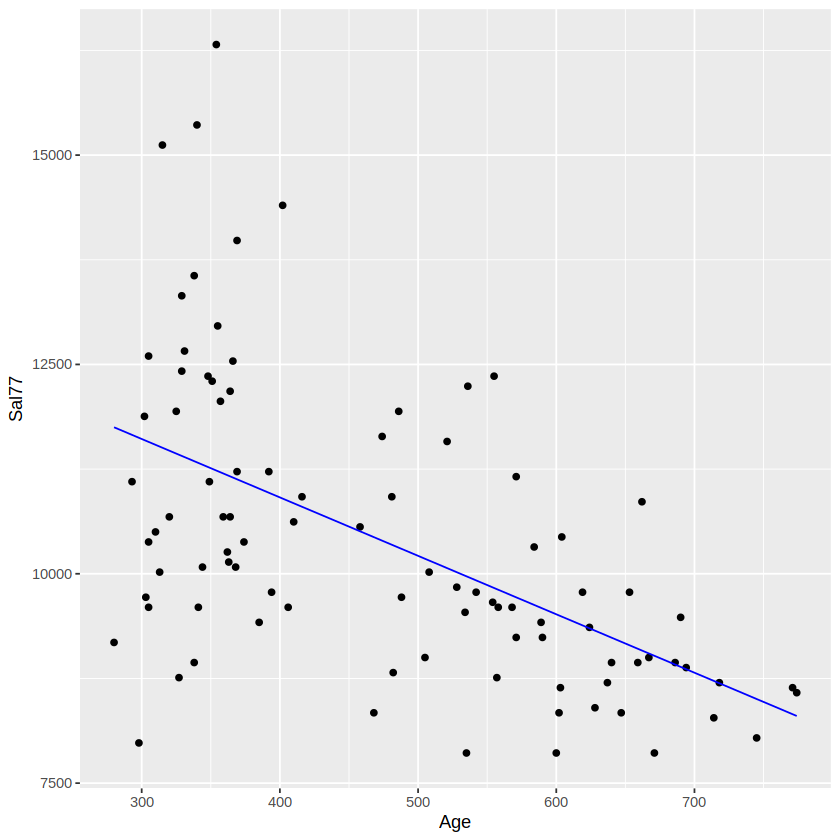

In [13]:
predicted <- predict(model, interval="prediction")
ggplot(df, aes(x=Age, y=Sal77)) +
    geom_point() +
    geom_line(aes(y=predicted[,1]), color="blue")

# Zkoumání závislosti platu na kategoriální proměnné

regresor: Sex

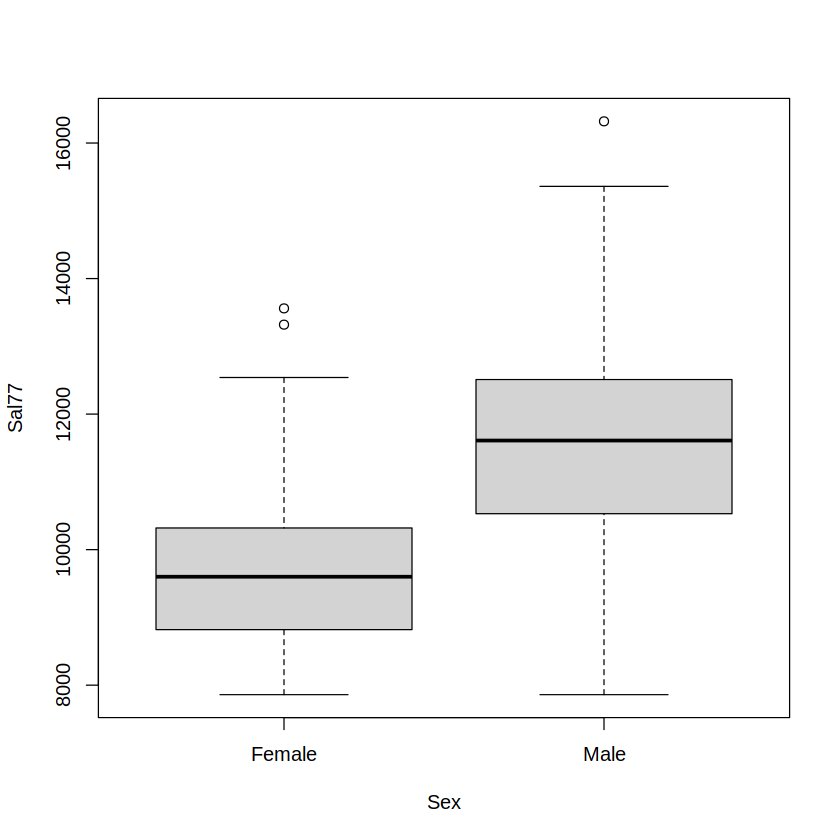

In [14]:
boxplot(Sal77~Sex)

Z výstupu výše je vidět, že platy žen jsou výrazně nižší než platy můžu, dává tedy smysl testovat rovnost jejich středních hodnot.

In [15]:
model <- lm(Sal77 ~ Sex)
summary(model)


Call:
lm(formula = Sal77 ~ Sex)

Residuals:
    Min      1Q  Median      3Q     Max 
-3821.3  -957.0  -117.0   678.7  4638.8 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9717.0      196.2  49.526  < 2e-16 ***
SexMale       1964.2      334.5   5.872 6.92e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1532 on 91 degrees of freedom
Multiple R-squared:  0.2748,	Adjusted R-squared:  0.2669 
F-statistic: 34.49 on 1 and 91 DF,  p-value: 6.925e-08


Model by pro ženy predikoval plat 9717 a pro muže 11681,2 (o 1964.2 více), což je o 20% více

Hodnoty, které by tento model predikoval jsou výběrové průměry v dané kategorii.

Nulovost koeficientu u idenfitifikátoru, zda osoba je muž, se zamítá - p hodnota je velice malá

Chtěli bychom otestovat zda střední hodnoty platů mužů a žen se rovnají na standardní hladině významnosti:

H0: Em = Ež (Střední hodnota platu mužů a žen se rovná)<br>
HA: Em != Ež (Střední hodnota platu mužů a žen se nerovná)

In [16]:
aov(Sal77~Sex)

anova(aov(Sal77~Sex))

Call:
   aov(formula = Sal77 ~ Sex)

Terms:
                      Sex Residuals
Sum of Squares   80978301 213680641
Deg. of Freedom         1        91

Residual standard error: 1532.364
Estimated effects may be unbalanced

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Sex,1,80978301,80978301,34.48616,6.924807e-08
Residuals,91,213680641,2348139,NA,NA


Z výstupu výše je vidět, že hypotéza o rovnosti střední hodnoty platu můžu a žen se zamítá na standardní hladině významnosti. Znamená to, že muži mají statisticky významně vyšší platy než ženy.

# Lineární regrese s oběma regresory

regresory: Age, Sex

In [17]:
model <- lm(Sal77 ~ Age*Sex, data=df)
summary(model)


Call:
lm(formula = Sal77 ~ Age * Sex, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2747.7  -776.0   -87.3   516.5  3961.7 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11847.933    604.725  19.592  < 2e-16 ***
Age            -4.255      1.160  -3.666 0.000418 ***
SexMale      3934.132   1069.209   3.679 0.000400 ***
Age:SexMale    -5.417      2.319  -2.336 0.021721 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1304 on 89 degrees of freedom
Multiple R-squared:  0.4864,	Adjusted R-squared:  0.4691 
F-statistic: 28.09 on 3 and 89 DF,  p-value: 7.122e-13


Tento model bude predikovat pro muže, kteří by byli staří 0 měsíců vyšší plat o 3934.132 oproti ženám

Je zajímavé, že koeficient u věku pro ženy je -4.255 a pro muže o 5.417 nižší -> pro muže je výsledný koeficient u věku -9,672

To znamená, že mužům klesá plat daleko výrazněji s věkem než ženám (skoro jednou tolik větší pokles)

Z výstupu je zároveň vidět, že hypotézy o nulovosti jakéhokoliv koeficientu by se zamítli na standardní hladině významnosti

Nejméně signifikantní regresor je v tomto modelu interakce Age:SexMale

Warning message in predict.lm(model, interval = "prediction"):
“predictions on current data refer to _future_ responses
”


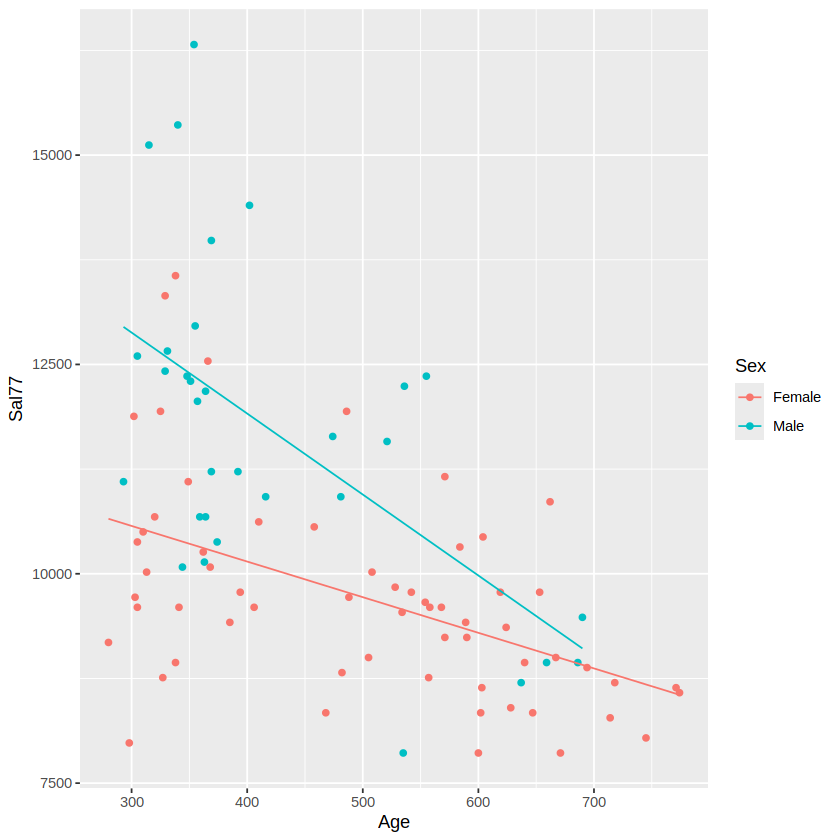

In [18]:
predicted <- predict(model, interval="prediction")
ggplot(df, aes(x=Age, y=Sal77, group=Sex, color=Sex)) +
    geom_point() +
        geom_line(aes(y=predicted[,1]))

Z tohoto grafu je opravdu vidět, že mužům klesá roční plat s věkem daleko výrazněji než ženám

Hypotézu, že střední hodnoty platů mužů a žen se nerovnají, jsme zamítli.<br>
Zároveň je ale vidět, že podle tohoto modelu by měli být zhruba stejné ve věku 700 měsíců = 58 let

# Výběr finálního modelu

regresory: Age, Sex, Educ

model obsahující všechny regresory i s interakcemi:


In [19]:
model <- lm(Sal77 ~ Age*Sex*Educ, data=df)
print("AIC:")
AIC(model)
summary(model)

[1] "AIC:"


[1] 1604.271


Call:
lm(formula = Sal77 ~ Age * Sex * Educ, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2562.8  -771.1  -122.5   535.0  4578.4 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)   
(Intercept)       1.071e+04  3.449e+03   3.105  0.00258 **
Age              -4.800e+00  6.090e+00  -0.788  0.43276   
SexMale          -2.440e+03  7.114e+03  -0.343  0.73246   
Educ              8.659e+01  2.912e+02   0.297  0.76692   
Age:SexMale       3.403e+00  1.377e+01   0.247  0.80543   
Age:Educ          6.315e-02  5.200e-01   0.121  0.90363   
SexMale:Educ      4.331e+02  5.474e+02   0.791  0.43098   
Age:SexMale:Educ -5.973e-01  1.081e+00  -0.552  0.58206   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1280 on 85 degrees of freedom
Multiple R-squared:  0.5276,	Adjusted R-squared:  0.4887 
F-statistic: 13.56 on 7 and 85 DF,  p-value: 1.201e-11


Z výstupu výše je vidět, že je v modelu hodně regresorů u kterých bychom nezamítli nulovou hypotézu o jejich nulovosti, zároveň ale nevíme zda bychom měli vynechat všechny tyto regresory nebo pouze nějakou podmnožinu

Použijeme tedy funcki step, která najde nejlepší model vzhledem ke kritériu AIC, které zohledňuje výkonnost modelu i počet regresorů:

In [20]:
step(lm(Sal77 ~ 1, data=df), scope=list(lower=~1, upper=~Age*Sex*Educ),data=df)

Start:  AIC=1394.09
Sal77 ~ 1

       Df Sum of Sq       RSS    AIC
+ Age   1  88083034 206575907 1363.1
+ Sex   1  80978301 213680641 1366.2
+ Educ  1  52230918 242428023 1378.0
<none>              294658942 1394.1

Step:  AIC=1363.06
Sal77 ~ Age

       Df Sum of Sq       RSS    AIC
+ Sex   1  45948344 160627563 1341.7
+ Educ  1  27540547 179035360 1351.8
<none>              206575907 1363.1
- Age   1  88083034 294658942 1394.1

Step:  AIC=1341.67
Sal77 ~ Age + Sex

          Df Sum of Sq       RSS    AIC
+ Educ     1  11952291 148675273 1336.5
+ Age:Sex  1   9282067 151345496 1338.1
<none>                 160627563 1341.7
- Sex      1  45948344 206575907 1363.1
- Age      1  53053078 213680641 1366.2

Step:  AIC=1336.47
Sal77 ~ Age + Sex + Educ

           Df Sum of Sq       RSS    AIC
+ Age:Sex   1   7311617 141363656 1333.8
+ Sex:Educ  1   3865660 144809613 1336.0
<none>                  148675273 1336.5
+ Age:Educ  1   1674637 147000636 1337.4
- Educ      1  11952291 160627563 13


Call:
lm(formula = Sal77 ~ Age + Sex + Educ + Age:Sex, data = df)

Coefficients:
(Intercept)          Age      SexMale         Educ  Age:SexMale  
   9871.778       -4.022     3461.640      155.385       -4.834  


Funkce step našla výsledný model s těmito regresory a vlastnostmi:

In [21]:
final_model <- lm(Sal77 ~ Age + Sex + Educ + Age:Sex, data=df)
summary(final_model)


Call:
lm(formula = Sal77 ~ Age + Sex + Educ + Age:Sex, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2600.4  -794.3   -73.0   533.1  4256.8 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9871.778    986.878  10.003 3.54e-16 ***
Age           -4.022      1.132  -3.553 0.000614 ***
SexMale     3461.640   1056.348   3.277 0.001503 ** 
Educ         155.385     62.335   2.493 0.014548 *  
Age:SexMale   -4.834      2.266  -2.133 0.035672 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1267 on 88 degrees of freedom
Multiple R-squared:  0.5202,	Adjusted R-squared:  0.4984 
F-statistic: 23.86 on 4 and 88 DF,  p-value: 2.203e-13


Jako finální model na predikci platu zaměstnance v bance bychom použili tento.

Koeficient u délky vzdělání je 155, to znamená, že kdyby stejný zaměstnanec měl o rok delší vzdělání (bez ohledu na pohlaví), tak by mu tento model predikoval o 155 dolarů větší roční plat.

Tento model má tedy podobné vlastnosti jako předchozí modely, akorát má o jeden regresor navíc - Educ - délka vzdělání v letech
- Pro ženy bez ohledu na věk predikuje menší plat než pro muže (o 3461.640 méně)
- Koeficient u věku mužů je výrazně nižší než u věku žen - plat mužů klesá výraznějí s věkem než ženám (jednou tolik - koeficient u mužů je −8,856 oproti -4.022 u žen)
- Podíváme-li se na Adj. R^2, tak můžeme vidět, že je menší než R^2. To protože používáme vícero regresorů a jejich počet se projevuje ve výpočtu

Koeficient R^2 hodnotí kvalitu daného modelu oproti modelu, který predikuje pouze průměr. Říká nám kolik variability bylo vysvětleno průměrem oproti našemu modelu, který používá více regresorů. (je to odečtené od jedničky -> čím vyšší tím lepší)

Malá p hodnota F statistiky (poslední řádek summary) značí, že náš model je statisticky významný a alespoň jeden regresor souvisí s vysvětlovanou proměnnou.

Z výstupu výše je také vidět to, že residua mají záporný medián. Minimum je -2600 -> to znamená, že model predikoval nějakou hodnotu nejvíce o 2600 méně než byla skutečnost. Naopak maximum je 4256.8 -> model predikoval nějakému zaměstnanci nejvíce o 4256.8 více, než byl jeho skutečný plat.

Vykreslíme si ještě graf cookových vzdáleností:

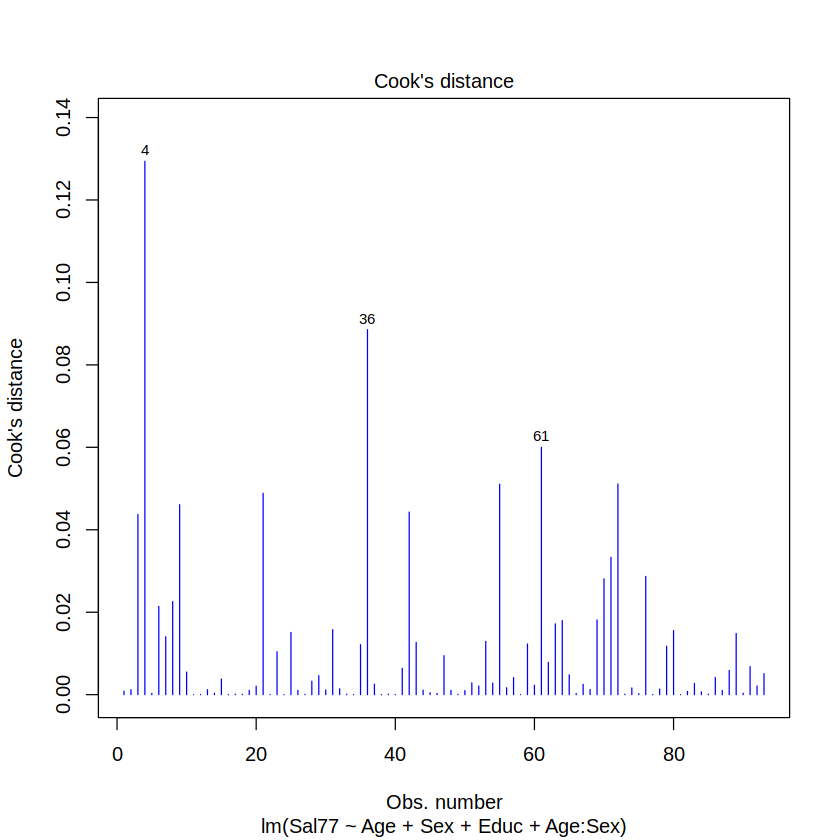

In [57]:
plot(final_model, which=4, col=c("blue"))

Z výstupu výše je vidět, že vynecháním 4. pozorování by se nám model změnil nejvíce. Nejspíše to bude to stejné pozorování, které má maximální velikost residua.

Pro zlepšení modelu by se dalo vynechat a zkusit model natrénovat bez tohoto pozorování. Z tohoto grafu je vidět, že "odlehlých" pozorování je více a nemyslím si, že by bylo vhodné vynechávat více pozorování, protože nemáme celkově moc dat.

# Ověření předpokladů použitých metod

AIC kritérium stojí na tom, že residua pocházejí z normálního rozdělení, takže bychom to měli otestovat. Budeme to testovat na finálním modelu dle zadání.

histogram reziduí:

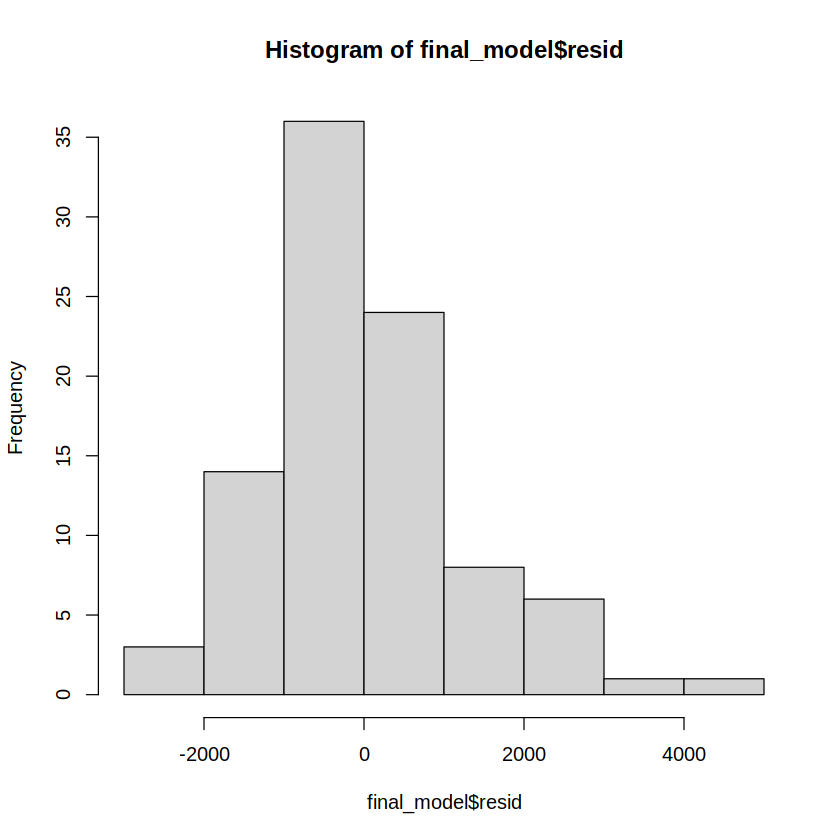

In [22]:
hist(final_model$resid)

Test normality reziduí na standardní hladině významnosti:

H0: reziuda mají normální rozdělení<br>
Ha: rezidua nemají normální rozdělení

In [23]:
shapiro.test(final_model$resid)


	Shapiro-Wilk normality test

data:  final_model$resid
W = 0.96184, p-value = 0.008152


P hodnota je nižší než 0.05, takže zamítáme nulovou hypotézu, že rezidua pochází z normálního rozdělení.

Takže bychom AIC neměli správně použít k výběru nejlepšího modelu. Mohli bychom tedy udělat model s logaritmem vysvětlované proměnné. To by mělo pomoci, aby rezidua pocházely z normálního rozdělení.

Zároveň aby fungovala metoda analýzy rozptylu ve třetí úloze, tak musí platit, že rezidua pocházejí z normálního rodělení a zároveň rozptyly reziudí napříč kategoriemi byly stejné

Normalitu reziduí jsme již zamítli v předchozím testu

Na standardní hladině významnosti musíme tedy ještě ověřit homogenitu.

H0: Rezidua mužů a žen mají rozdílný rozptyl.<br>
HA: Rezidua mužů a žen nemají rozdílný rozptyl.

In [24]:
bartlett.test(Sal77 ~ Sex)


	Bartlett test of homogeneity of variances

data:  Sal77 by Sex
Bartlett's K-squared = 8.681, df = 1, p-value = 0.003216


I zde bychom zamítli nulovou hypotézu, že rezidua mužů a žen mají rozdílný rozptyl.

Anova bychom tedy správně neměli použít na tomto modelu. Mohli bychom udělat model, kde vysvětlovaná proměnná by byla logaritmus Sal77. Tím bychom mohli dosáhnout toho, že by tyto předpoklady byly splněné.